In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import gdown

In [ ]:
url = "https://drive.google.com/uc?id=1fDGZh86UPUkt2K6enlNQfB0mswU8pB_P"
output_file = "gapminder_full.csv"  # Replace with the desired filename and extension
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fDGZh86UPUkt2K6enlNQfB0mswU8pB_P
To: /content/gapminder_full.csv
100%|██████████| 83.8k/83.8k [00:00<00:00, 55.0MB/s]


'gapminder_full.csv'

1.Load the dataset and display the first few rows.

In [2]:
data = pd.read_csv("gapminder_full.csv")
df = pd.DataFrame(data)
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


How many countries does the dataset have?

In [ ]:
num_countries = df['country'].nunique()
print(f"The dataset contains {num_countries} unique countries.")

The dataset contains 142 unique countries.


2.	Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.


In [ ]:
pivot_table = pd.pivot_table(data, values='life_exp', index='continent', columns='year', aggfunc='mean')
pivot_table

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


3.Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [ ]:
#filtering the year
data_2007 = df[df['year'] == 2007]

#finding out and storing 75th percentile value in a variable
gdp_75th_percentile = data_2007['gdp_cap'].quantile(0.75)
print(f"75th percentile value: {gdp_75th_percentile.round(2)}")

75th percentile value: 18008.84


In [ ]:
#filtering out dataframe for gdp value condition
data_2007 = data_2007[data_2007['gdp_cap'] > gdp_75th_percentile]
# printing countries
data_2007['country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

4.	Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [3]:
bins = [df['life_exp'].min(),
        df['life_exp'].quantile(0.25),
        df['life_exp'].quantile(0.5),
        df['life_exp'].quantile(0.75),
        df['life_exp'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']

# Use pd.cut to categorize 'life_exp'
df['Life_Exp_Range'] = pd.cut(df['life_exp'], bins=bins, labels=labels, include_lowest=True)

df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


5.Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

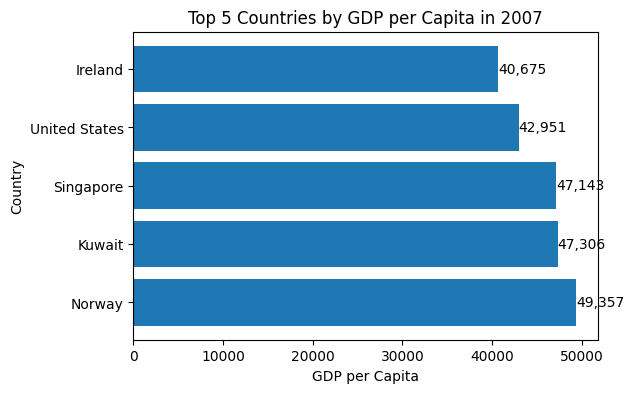

In [ ]:
df_2007 = df[df['year'] == 2007]

df_2007_sorted = df_2007.sort_values(by='gdp_cap', ascending=False)

top_5_countries = df_2007_sorted.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(top_5_countries['country'], top_5_countries['gdp_cap'])
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.title('Top 5 Countries by GDP per Capita in 2007')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}', va='center')
plt.show()

6.Find all country names that start with "I" and end with "a" using regex.

In [ ]:
pattern = r'^I[a-zA-Z]*a$'

matching_countries = df['country'][df['country'].str.match(pattern)].unique()

print(matching_countries)

['India' 'Indonesia']


7.Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


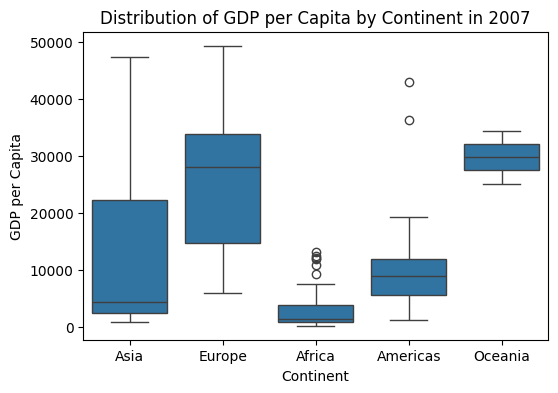

In [ ]:
df_2007 = df[df['year'] == 2007]

plt.figure(figsize=(6, 4))
sns.boxplot(x='continent', y='gdp_cap', data=df_2007)
plt.title('Distribution of GDP per Capita by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.show()

8.Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.


In [ ]:
# Filter the data for 2007
data_2007 = df[df['year'] == 2007]

# Filter the data for life expectancy over 80 years
countries_over_80 = data_2007[data_2007['life_exp'] > 80]

# Print the countries and their respective continents
print(countries_over_80[['country', 'continent']])

               country continent
71           Australia   Oceania
251             Canada  Americas
539             France    Europe
671   Hong Kong, China      Asia
695            Iceland    Europe
767             Israel      Asia
779              Italy    Europe
803              Japan      Asia
1103       New Zealand   Oceania
1151            Norway    Europe
1427             Spain    Europe
1475            Sweden    Europe
1487       Switzerland    Europe


9.Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).


In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Extract the decade
df['Decade'] = (df['year'].dt.year // 10) * 10
df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970


10.Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.


In [ ]:
correlation_matrix = df[['gdp_cap', 'life_exp', 'population']].corr()
correlation_matrix

,gdp_cap,life_exp,population
gdp_cap,1.000000,0.583706,-0.025600
life_exp,0.583706,1.000000,0.064955
population,-0.025600,0.064955,1.000000


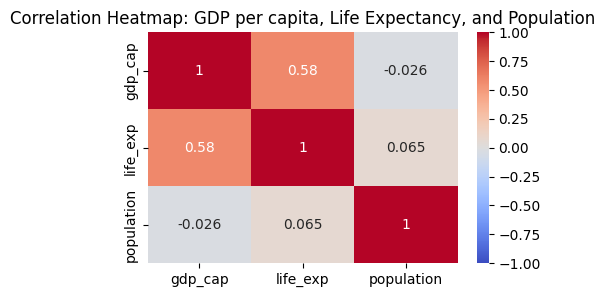

In [ ]:
# Create a heatmap using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: GDP per capita, Life Expectancy, and Population')
plt.show()

11.How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.


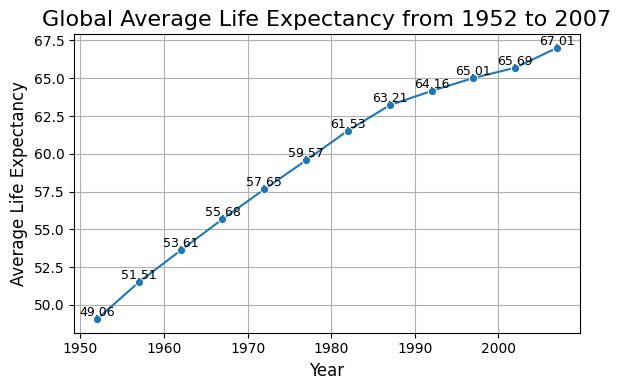

In [ ]:
# Group by year and calculate the mean life expectancy
global_avg_life_exp = df.groupby('year')['life_exp'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(6, 4))
sns.lineplot(x='year', y='life_exp', data=global_avg_life_exp, marker='o')
plt.title('Global Average Life Expectancy from 1952 to 2007', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.grid(True)

for i, row in global_avg_life_exp.iterrows():
    plt.text(row['year'], row['life_exp'], f'{row["life_exp"]:.2f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

12.For the year 2007, analyze the relationship between life expectancy and GDP per capita. Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.


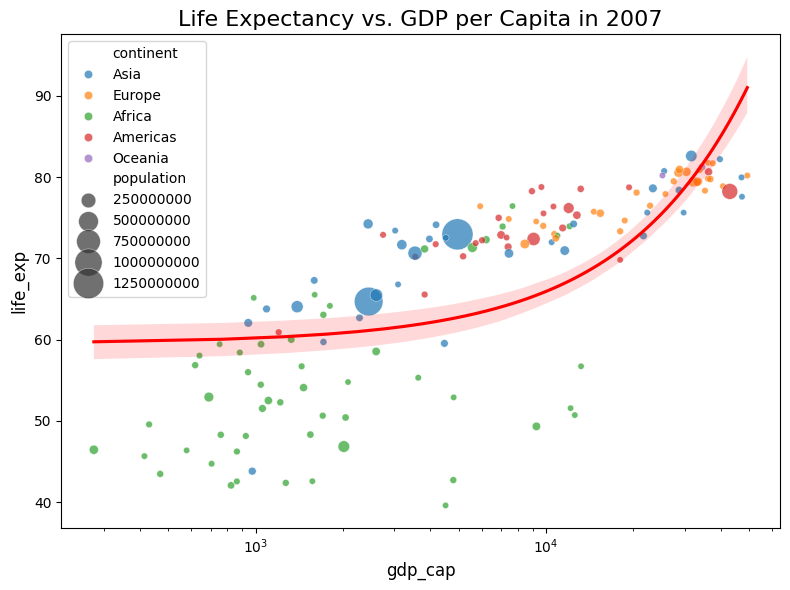

In [ ]:
data = pd.read_csv("gapminder_full.csv")
df = pd.DataFrame(data)

# Filter data for the year 2007
df_2007 = df[df['year'] == 2007]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2007, x='gdp_cap', y='life_exp', hue='continent', size='population',
                sizes=(20, 500), alpha=0.7)

# Customize the plot
plt.title('Life Expectancy vs. GDP per Capita in 2007', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.xscale('log')  # Use log scale for GDP per capita

# Add a trend line
sns.regplot(data=df_2007, x='gdp_cap', y='life_exp', scatter=False, color='red')

plt.tight_layout()
plt.show()

13.Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.


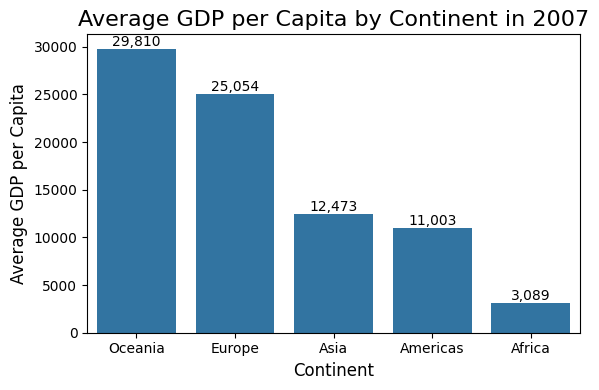

continent
Oceania     29810.0
Europe      25054.0
Asia        12473.0
Americas    11003.0
Africa       3089.0
Name: gdp_cap, dtype: float64 2


In [ ]:
# Filter data for the year 2007
df_2007 = df[df['year'] == 2007]

# Calculate average GDP per capita for each continent
avg_gdp_per_continent = df_2007.groupby('continent')['gdp_cap'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_gdp_per_continent.index, y=avg_gdp_per_continent.values)

# Customize the plot
plt.title('Average GDP per Capita by Continent in 2007', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average GDP per Capita', fontsize=12)
plt.xticks(rotation=0)  # Ensure continent names are horizontal

# Add value labels on top of each bar
for i, v in enumerate(avg_gdp_per_continent.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the data
print(round(avg_gdp_per_continent),2)

14.Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
-	Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
-	Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.
Filter data for Afghanistan and Switzerland in 2007

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

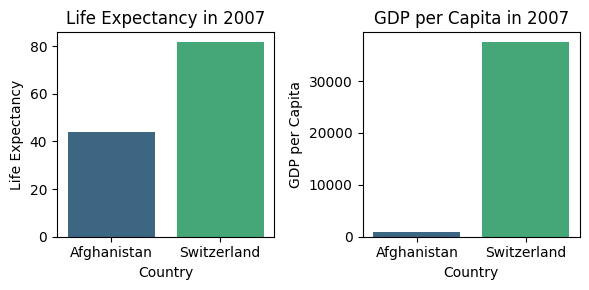

In [ ]:
df_14 = df[(df['country'].isin(['Afghanistan', 'Switzerland'])) & (df['year'] == 2007)]

# Reset index to avoid warnings
df_14.reset_index(drop=True, inplace=True)

# Create subplots with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 2, figsize=(6, 3))

# Bar chart for Life Expectancy
sns.barplot(data=df_14, x='country', y='life_exp', ax=ax1[0], hue='country', palette='viridis', legend=False)
ax1[0].set_title('Life Expectancy in 2007')
ax1[0].set_ylabel('Life Expectancy')
ax1[0].set_xlabel('Country')

# Bar chart for GDP per capita
sns.barplot(data=df_14, x='country', y='gdp_cap', ax=ax1[1], hue='country', palette='viridis', legend=False)
ax1[1].set_title('GDP per Capita in 2007')
ax1[1].set_ylabel('GDP per Capita')
ax1[1].set_xlabel('Country')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

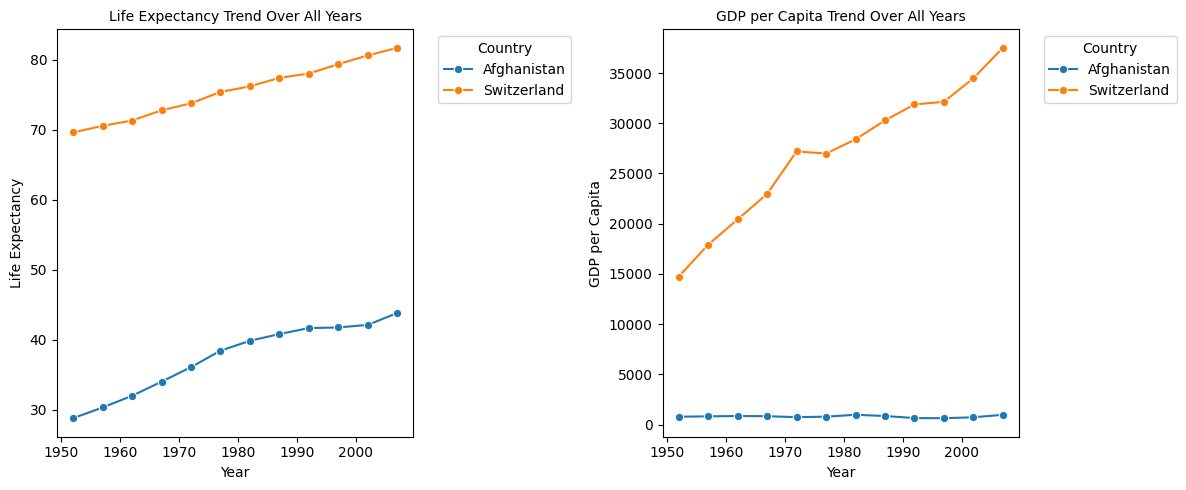

In [ ]:
afghanistan_all_years = df[df['country'] == 'Afghanistan']
switzerland_all_years = df[df['country'] == 'Switzerland']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Line graph for Life Expectancy Trend
sns.lineplot(data=afghanistan_all_years, x='year', y='life_exp', label='Afghanistan', marker='o', ax=ax[0])
sns.lineplot(data=switzerland_all_years, x='year', y='life_exp', label='Switzerland', marker='o', ax=ax[0])

ax[0].set_title('Life Expectancy Trend Over All Years', fontsize=10)
ax[0].set_xlabel('Year', fontsize=10)
ax[0].set_ylabel('Life Expectancy', fontsize=10)
ax[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Line graph for GDP per Capita Trend
sns.lineplot(data=afghanistan_all_years, x='year', y='gdp_cap', label='Afghanistan', marker='o', ax=ax[1])
sns.lineplot(data=switzerland_all_years, x='year', y='gdp_cap', label='Switzerland', marker='o', ax=ax[1])

ax[1].set_title('GDP per Capita Trend Over All Years', fontsize=10)
ax[1].set_xlabel('Year', fontsize=10)
ax[1].set_ylabel('GDP per Capita', fontsize=10)
ax[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences. show it in python


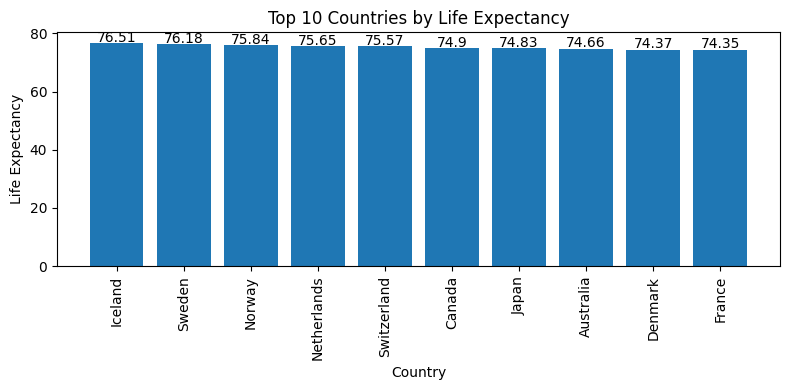

In [ ]:
# Group the data by country and calculate the average life expectancy and GDP per capita
country_data = df.groupby('country').agg({'life_exp': 'mean', 'gdp_cap': 'mean'})

# Sort the countries by life expectancy
country_data = country_data.sort_values(by='life_exp', ascending=False)

# Plot the top 10 countries by life expectancy
plt.figure(figsize=(8, 4))
plt.bar(country_data.index[:10], country_data['life_exp'][:10])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 10 Countries by Life Expectancy')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
for i, value in enumerate(country_data['life_exp'][:10]):
    plt.text(i, value + 0.5, str(round(value, 2)), ha='center')  # Add labels above each bar
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

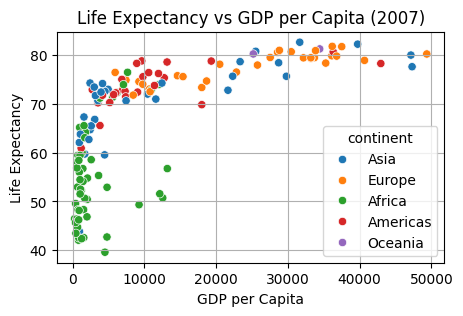

In [ ]:
data['year'] = pd.to_datetime(data['year'], format='%Y', errors='coerce')

df = data[data['year'].dt.year == 2007]

plt.figure(figsize=(5, 3))
plt.title('Life Expectancy vs GDP per Capita (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.legend(title='Continent')

chart = sns.scatterplot(data=df, x='gdp_cap', y='life_exp', hue='continent')
plt.show()

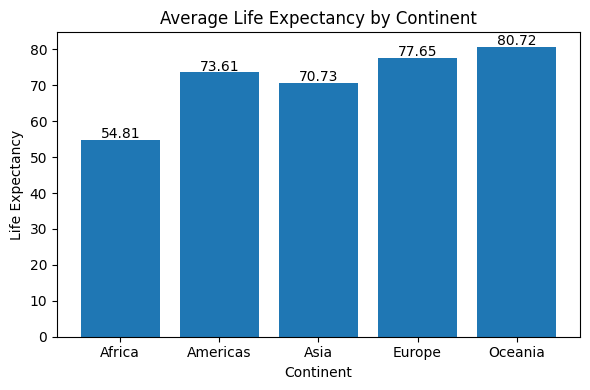

In [ ]:
# Group the data by continent and calculate the average life expectancy and GDP per capita
continent_data = df.groupby('continent').agg({'life_exp': 'mean', 'gdp_cap': 'mean'})

# Plot the average life expectancy and GDP per capita by continent
plt.figure(figsize=(6, 4))
plt.bar(continent_data.index, continent_data['life_exp'])
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectancy by Continent')
for i, value in enumerate(continent_data['life_exp']):
    plt.text(i, value + 0.5, str(round(value, 2)), ha='center')  # Add labels above each bar
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

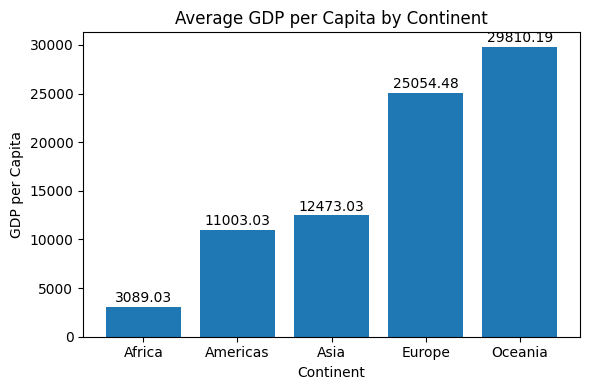

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(continent_data.index, continent_data['gdp_cap'])
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.title('Average GDP per Capita by Continent')
for i, value in enumerate(continent_data['gdp_cap']):
    plt.text(i, value + 500, str(round(value, 2)), ha='center')
plt.tight_layout()
plt.show()

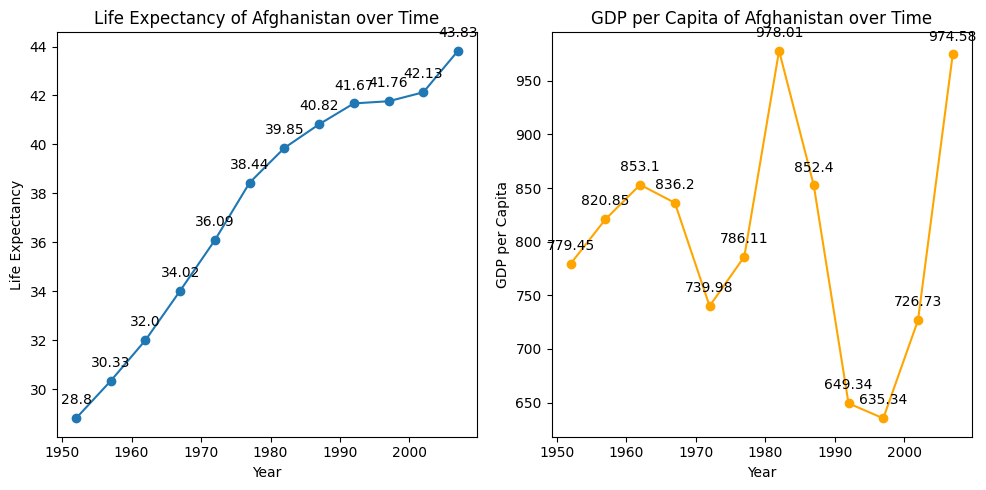

In [ ]:
df = pd.DataFrame(data)
# Analyze the stability or instability of a country over time
country = 'Afghanistan'
country_data = df[df['country'] == country]

# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot Life Expectancy
ax[0].plot(country_data['year'], country_data['life_exp'], marker='o')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Life Expectancy')
ax[0].set_title(f'Life Expectancy of {country} over Time')
for i, value in enumerate(country_data['life_exp']):
    ax[0].annotate(str(round(value, 2)),
                   (country_data['year'].iloc[i], value),
                   textcoords="offset points",
                   xytext=(0, 10),
                   ha='center')

# Plot GDP per Capita
ax[1].plot(country_data['year'], country_data['gdp_cap'], marker='o', color='orange')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP per Capita')
ax[1].set_title(f'GDP per Capita of {country} over Time')
for i, value in enumerate(country_data['gdp_cap']):
    ax[1].annotate(str(round(value, 2)),
                   (country_data['year'].iloc[i], value),
                   textcoords="offset points",
                   xytext=(0, 10),
                   ha='center')

plt.tight_layout()
plt.show()